In [1]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [34]:
X = boston.data
y = boston.target

In [35]:
import numpy as np

u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [37]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [52]:
def hypothesis(X, theta):        
    return np.dot(X,theta)

def error(X,y,theta):
    m = X.shape[0]
    error = 0.0
    y_ = hypothesis(X,theta)
    error = np.sum((y_ - y)**2)
        
    return error/m

def gradient(X,Y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    y_ = hypothesis(X,theta)
    
    grad = np.dot(X.T,(y_-y))
            
    return grad/m

def gradient_descent(X,Y,lr=0.1,max_steps=300):
    m,n = X.shape
    error_list = []
    theta = np.zeros((n,))
    
    for i in range(max_steps):
        e  = error(X,y,theta)
        error_list.append(e)
        
        grad = gradient(X,y,theta) 
        theta = theta - lr*grad
            
    return theta, error_list

In [59]:
import time
start = time.time()
theta, error_list = gradient_descent(X,y)
end = time.time()
print("The time taken by vectorized code: ",end-start)

The time taken by vectorized code:  0.019948720932006836


In [55]:
print(theta)

[ 2.25328063e+01 -9.03091692e-01  1.03815625e+00  1.53477685e-02
  6.99554920e-01 -2.02101672e+00  2.70014278e+00 -1.93085233e-03
 -3.10234837e+00  2.34354753e+00 -1.72031485e+00 -2.04614394e+00
  8.47845679e-01 -3.73089521e+00]


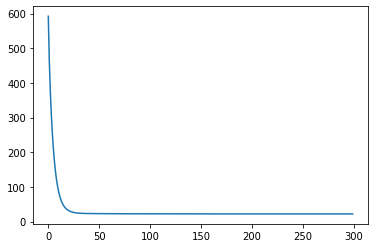

In [41]:
import matplotlib.pyplot as plt
plt.plot(error_list)

In [47]:
y_ = []
m = X.shape[0]
for i in range(m):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [48]:
def r2_squared(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1 - num/denom)
    
    return score*100

In [49]:
r2_squared(y,y_)

74.04541323942743